# Home Assignment No. 1
## v1.0
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = arr - np.mean(arr, axis=0)  
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{4,8\}$, $r\in\{1,2\}$, $d\in\{2,4\}$.

Make sure that each plot has a different color.

To compute LCM you can use `math.gcd` and the relationship between LCM and GCD.

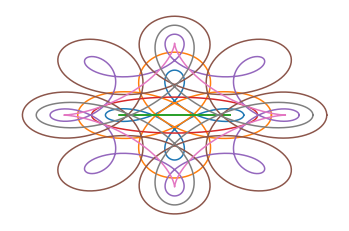

In [3]:
### BEGIN Solution (do not delete this comment)
import math
import itertools


def plot_hypotrochoid(R, r, d):
    t = np.linspace(0, 2 * np.pi * np.lcm(r, R) / R, num=1000)
    x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
    y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
    plt.plot(x, y)
    plt.axis('off')

    
R_values, r_values, d_values = [4, 8], [1, 2], [2, 4]
    
for R, r, d in itertools.product(R_values, r_values, d_values): 
    plot_hypotrochoid(R, r, d)

### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

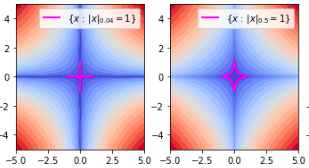

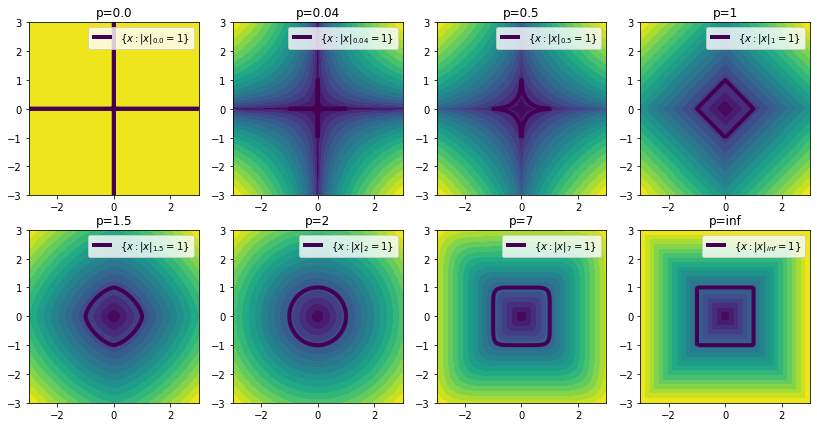

In [2]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1) // 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    """
    a.reshape(-1) || transforms 2D-array into 1D-array.
    np.c_(a,b)    || stacks two 1D-array into one 2D-array
    
    'vectors' -- a 2D-array with all points containing in the meshgrid (xx, yy). 
                 Each point has two coordinates, so 
                 points.shape = (xx.shape[0] * xx.shape[0], 2)
    'z'       -- a 1D-array containing p-norm of each vector in 'vectors', 
                 z.shape = (xx.shape[0] * xx.shape[0], 2)
    'zz'      -- a 2D-array containig the p-norms of vectors with coordinates (xx[i,k], yy[i,k])
    """
    
    ### BEGIN Solution (do not delete this comment)
    from numpy import linalg
    
    vectors = np.c_[xx.reshape(-1), yy.reshape(-1)]
    z = linalg.norm(vectors, ord=p, axis=1)
    zz = z.reshape(xx.shape)
    
    ax.contourf(xx, yy, zz, levels=np.linspace(zz.min(), zz.max(), 20))
    
    unit_vector = ax.contour(xx, yy, zz, levels=[1], linewidths=4)
    unit_vector.collections[0].set_label("$\{x: |x|_{%s} = 1 \}$" % p)
    
    ax.set_title(f'p={p}')
    ax.legend()
    ### END Solution (do not delete this comment)

plt.show()

In [5]:
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff315597220>,
      dtype=object)

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [5]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    np.random.seed(0xBEEFBAD)
    
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

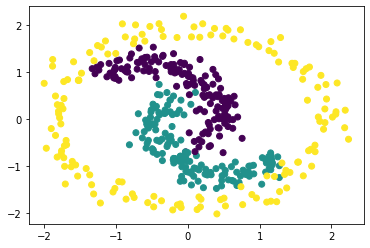

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![title](data/example.png)

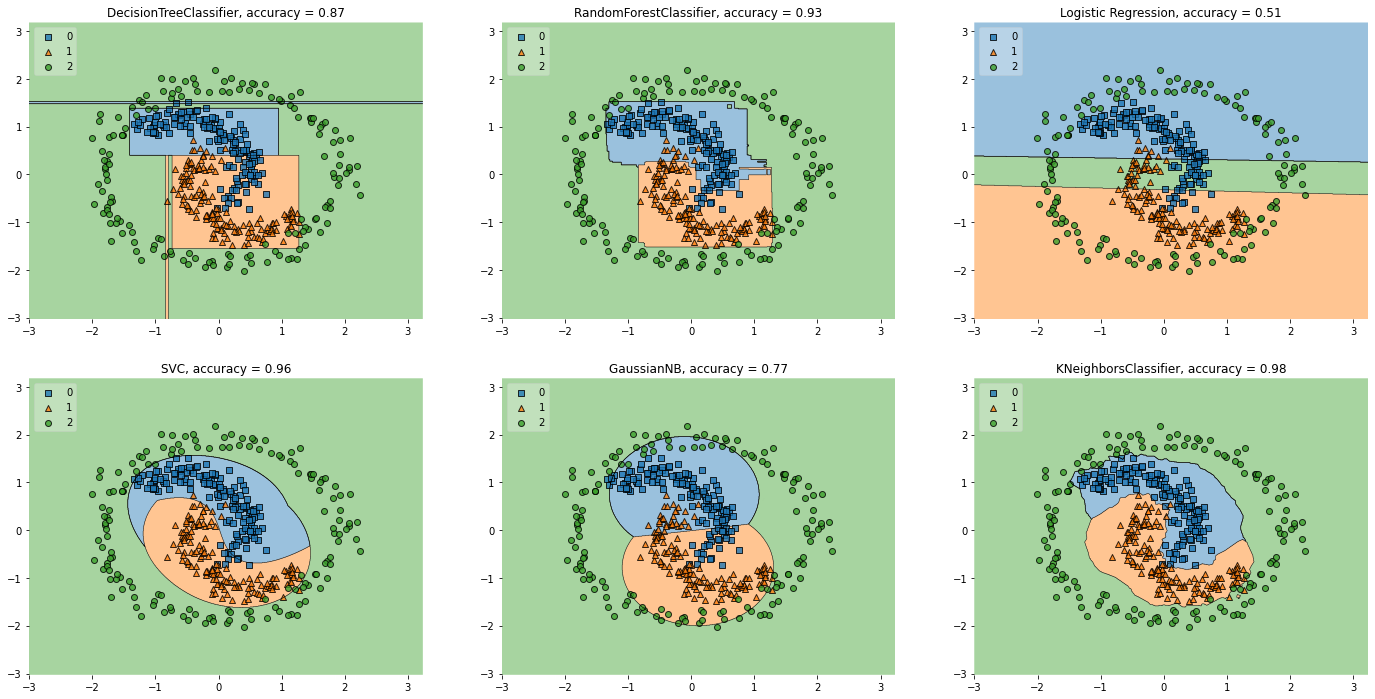

In [7]:
### BEGIN Solution (do not delete this comment)

import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Initializing Classifiers
clf1 = DecisionTreeClassifier(random_state=0, max_depth=4)
clf2 = RandomForestClassifier(random_state=3, max_depth=4, n_estimators=25)
clf3 = LogisticRegression(random_state=0)
clf4 = SVC(kernel='rbf',random_state=0)
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors=3)

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(24, 12))

labels = ['DecisionTreeClassifier',
          'RandomForestClassifier',
          'Logistic Regression',
          'SVC',
          'GaussianNB',
          'KNeighborsClassifier']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X, y)
    accuracy = accuracy_score(y, clf.predict(X))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(f'{lab}, accuracy = {accuracy:.2f}')

plt.show()

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

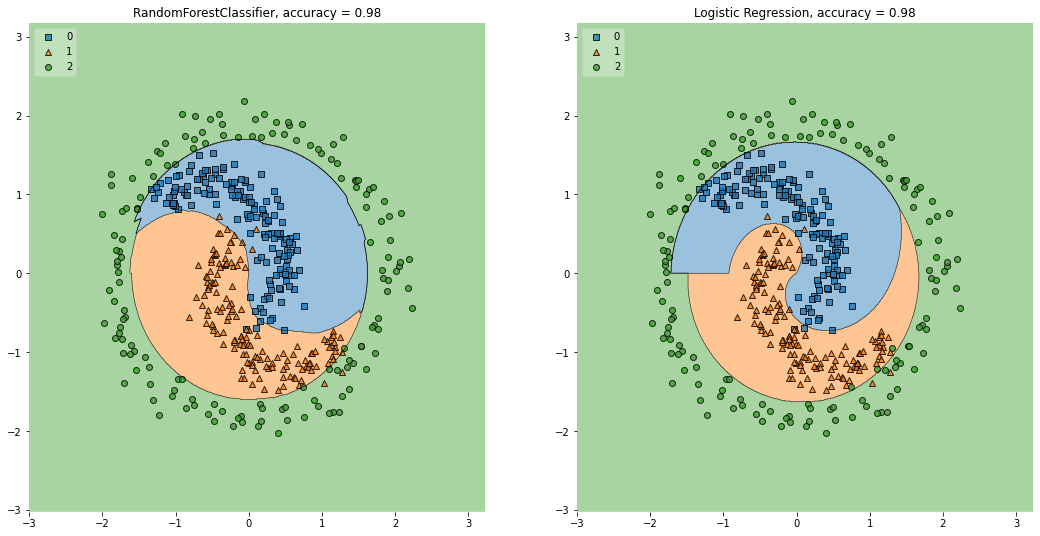

In [8]:
### BEGIN Solution (do not delete this comment)
import matplotlib.gridspec as gridspec
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline

from mlxtend.plotting import plot_decision_regions

# This class replaces two initial features x1, x2 
# by phi(x1, x2) and r(x1, x2)
class ReplaceToPolarCoordinates:
    def __init__(self,):
        pass
    
    def to_polar(self, x, y):
        r = np.sqrt(x**2 + y**2)
        phi = np.arctan2(y, x)
        return phi, r
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        phi_s, r_s = self.to_polar(X[:, 0].reshape((-1, 1)), 
                                   X[:, 1].reshape((-1, 1)))
        X = np.concatenate((phi_s, r_s), axis=1)
        return X
    
# This class adds to initial features the sums and differences 
# between all possible pairs of features 
class AddSumAndDiff:
    def __init__(self,):
        pass
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        num_features = X.shape[1]
        for l, m in itertools.product(range(num_features),range(num_features)):
            if m > l:
                diff = (X[:, l] - X[:, m]).reshape((-1, 1))
                summ = (X[:, l] + X[:, m]).reshape((-1, 1))
                X = np.concatenate((X, diff), axis=1)
                X = np.concatenate((X, summ), axis=1)
        return X

# Initializing Classifiers
clf1 = RandomForestClassifier(random_state=2, max_depth=3, n_estimators=25)
clf2 = LogisticRegression(random_state=0)


# Pipeline for correct procedure of Feature Engineering without information leaking
pipe1 = Pipeline([('ReplaceToPolarCoordinates', ReplaceToPolarCoordinates()),
                  ('AddSumAndDiff', AddSumAndDiff()),
                  ('PolynomialFeatures', PolynomialFeatures(degree = 3)),
                  ('RandomForestClassifier', clf1)])

pipe2 = Pipeline([('ReplaceToPolarCoordinates', ReplaceToPolarCoordinates()),
                  ('Scaler', StandardScaler()), 
                  ('PolynomialFeatures', PolynomialFeatures(degree = 3)),
                  ('LogisticRegression', clf2)])


# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(18, 9))

labels = ['RandomForestClassifier', 'Logistic Regression']

for clf, lab, grd in zip([pipe1, pipe2],
                         labels,
                         itertools.product([0], [0, 1])):
    clf.fit(X, y)
    accuracy = accuracy_score(y, clf.predict(X))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(f'{lab}, accuracy = {accuracy:.2f}')

plt.show()

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

1. For **RandomForestClassifier**, I chose the following pipeline: 
    * Replace initial coordinates (features) to polar coordinates - because it's clear that these coordinates suite better for this dataset
    * Add sums and differences - it was empirically obtained that we can help to a Random Forest just by adding sums and differences between pairs of features (it is related to the fact, that its decision boundaries are always parallel to the axes of feature space)
    * Add polynomial features  - adding non-linear features here makes decision regions a bit more 'smoother'
1. For **Logistic Regression**, I chose the following pipeline: 
    * Replace initial coordinates (features) to polar coordinates - because it's clear that these coordinates suite better for this dataset
    * Standardize features by removing the mean and scaling to unit variance -  to avoid different scales of feature values, that would be even more exaggerated with adding polynomial features
    * Add polynomial features - to add into this originally linear model non-linear features



## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [9]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
857,o,b,x,o,x,x,o,b,b,False
375,o,o,x,x,x,b,x,b,o,True
196,x,o,b,x,o,x,x,b,o,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for empty cell `b`.

In [10]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
183,1,-1,-1,0,1,0,-1,1,1
371,-1,-1,1,1,1,-1,1,1,-1
763,-1,1,1,-1,0,1,-1,0,0
931,0,0,1,-1,-1,-1,1,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use the accuracy metric.

Intuitively, this rule is logical, i.e. one may expect a decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [11]:
np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [12]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on a train set for optimal hyperparameter for SVM model in order to achieve a 5-fold validation accuracy score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage you to use the built-in `GridSearchCV` method. **Report** the 5-fold validation accuracy score, test accuracy score using the model refitted with best hyperparameters and also print best hyperparameters. **Explain** the results: does your model overfit?

In [13]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

clf = GridSearchCV(SVC(random_state=0),
                   {'gamma': [0.001, 0.01, 0.1, 1, 5, 'auto'], 
                    'C': [10e-3, 10e-2, 10e-1, 5, 10, 20, 100]},        
                   scoring=make_scorer(accuracy_score),
                   cv=5)
clf.fit(X_train, y_train)

# Calculate test score using the model with best hyperparameters
# (clf.predict() will automatically choose the best model for prediction):
test_score = accuracy_score(y_test, clf.predict(X_test))

print(f'SVM scored on CV {clf.best_score_:.4f}')
print(f'SVM scored on test {test_score:.3f}')
print(f"best C: {clf.best_params_['C']}, \
      best gamma: {clf.best_params_['gamma']}")

### END Solution (do not delete this comment)

SVM scored on CV 0.9803
SVM scored on test 0.985
best C: 20,       best gamma: 0.01


**Your text answer (do not delete this comment)**:

No, the model doesn't overfit, because in case of overfitting the test accuracy is much lower, than train or validation accuracy. Here we have the opposite: the test score is even slightly higher than the cross-validation score.

### Subproblem 5.2. Feature engineering for Random Forest  (1 of 2 points)
Perform **feature engineering** for Random Forest with given hyperparameters in order to achieve 5-fold mean validation score not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [14]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)

### BEGIN Solution (do not delete this comment)
from sklearn.model_selection import cross_val_score
    
class AddSumsOverDiagonalsRowsColumns:
    def __init__(self,):
        pass
    
    def fit(self, X, y):
        return self
     
    def transform(self, X):
        result = X
        diags = {'left_diag'  : ['TL', 'MM', 'BR'],
                 'right_diag' : ['TR', 'MM', 'BR'],
                 '1_row'      : ['TL', 'TM', 'TR'],
                 '2_row'      : ['ML', 'MM', 'MR'],
                 '3_row'      : ['BL', 'BM', 'BR'],
                 '1_column'   : ['TL', 'ML', 'BL'],
                 '2_column'   : ['TM', 'MM', 'BM'],
                 '3_column'   : ['TR', 'MR', 'BR']}
        for diag in diags.keys():
            idx1, idx2, idx3 = diags[diag]
            new_feature = X.loc[:,idx1] \
                        + X.loc[:,idx2] \
                        + X.loc[:,idx3]
            new_feature.name = diag
            result = pd.concat([result, new_feature], axis=1)
        return result.iloc[:, -8:] 

    
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

pipe2 = Pipeline([('AddSumsOverDiagonalsRowsColumns', AddSumsOverDiagonalsRowsColumns()),
                  ('RandomForestClassifier', rf)])

pipe2.fit(X_train, y_train)
scores = cross_val_score(pipe2, X_train, y_train, cv=5)
test_score = pipe2.score(X_test, y_test)
print(f"Random Forest scored {scores.mean():.3f} on CV with extra features")
print(f"Random Forest scored {test_score:.3f} on Test")


### END Solution (do not delete this comment)

Random Forest scored 0.961 on CV with extra features
Random Forest scored 0.991 on Test


**Your text answer (do not delete this comment)**:

We can help a lot to a Random Forest just by adding sums and differences between pairs of features, 
but in the case of Tic-Tac-Toe dataset adding only sums will be enough. 
A handmade transformer AddSumsOverDiagonalsRowsColumns() transforms 9 given features to the 8 sums across all possible directions. Practically this is equivalent to searching for three crosses along each row, column and diagonal.

## Task 6. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [2]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3.0,23.80
608,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90.0,21.95
671,236.0,157.0,0.0,192.0,0.0,972.6,749.1,7.0,20.42


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into the train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 6.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the whole train data using 5-fold cross-validation scheme) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the 5-fold mean train score, 5-fold mean validation score and the test score (to obtain test score use the model with best hyperparameters refitted on the whole train set).

In [3]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, cross_validate 


def train_val_test_scores(grid_search_after_fit, X_train, y_train, X_test, y_test):
    # From object GridSearchCV AFTER .fit() we can get the model with 
    # the best hyperparameters by using the attribute .best_estimator_
    best_estimator = grid_search_after_fit.best_estimator_
    
    
    # Calculate the 5-fold mean train score & mean validation score 
    # for optimal hyperparameters by using 
    # cross_validate() with return_train_score=True.
    cross_validate_results = cross_validate(best_estimator, X_train, y_train, cv=5,
                                           scoring='neg_mean_squared_error',
                                           return_train_score=True)
    ### TRAIN scores are stored with the key 'train_score'.
    train_score = -cross_validate_results['train_score'].mean()
    ### VALIDATION scores are stored with the key 'test_score'.
    validation_score = -cross_validate_results['test_score'].mean()
    
    
    # Calculate the TEST score using model with best 
    # hyperparameters refitted on the whole train set. Since in GridSearch_CV 
    # we used refit=True, when we will use the method .predict() namely the model
    # with the best hyperparameters refitted on whole train data will be used
    test_score = mean_squared_error(y_test, grid_search_after_fit.predict(X_test))
    
    return round(train_score, 2), round(validation_score, 2), round(test_score, 2)


    
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=1),
                   {
                    'n_estimators': [175, 200, 225], 
                     'max_depth': [12, 15, 16],
                     'min_samples_leaf' : [1, 2, 5],
                     'max_features' : [0.5, 0.7, 1.0],
                   }, 
                   scoring='neg_mean_squared_error',
                   cv=5,
                   refit=True, n_jobs=-1)

et_grid_search = GridSearchCV(ExtraTreesRegressor(random_state=1),
                   {
                    'n_estimators': [200, 225, 250], 
                     'max_depth': [15, 16, 20],
                     'min_samples_leaf' : [1, 2, 5],
                     'max_features' : [0.5, 1.0, 'sqrt'],
                   }, 
                   scoring='neg_mean_squared_error',
                   cv=5,
                   refit=True, n_jobs=-1)

rf_grid_search.fit(X_train, y_train)
et_grid_search.fit(X_train, y_train)
rf_train, rf_valid, rf_test = train_val_test_scores(
                            rf_grid_search, X_train, y_train, X_test, y_test)
et_train, et_valid, et_test = train_val_test_scores(
                            et_grid_search, X_train, y_train, X_test, y_test)

data = [['ExtraTreesRegressor', et_train, et_valid, et_test],
        ['RandomForestRegressor', rf_train, rf_valid, rf_test]]
answer = pd.DataFrame(data, columns=['Ensemble Classifier', 'Train', 'Valid', 'Test'])
print(answer)

### END Solution (do not delete this comment)

     Ensemble Classifier  Train  Valid   Test
0    ExtraTreesRegressor   1.24  24.65  22.57
1  RandomForestRegressor   4.90  27.28  23.91


### Subproblem 6.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

* MSE errors for train are lower than errors for validation/test, because regressors were fitted on train data or in other words, the regressors were taught to give a small error on the train data. The validation and test parts were unknown for the models, and it's natural to expect that on this data the performance will be worse.
* ExtraTreesRegressor seems to have better performance on the training set. The possible explanation is as follows. It was empirically obtained, that Extra Trees perform consistently better when there are a few relevant predictors and many noisy ones ([source](https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/)). Seems to be exactly what's going on in this data, because one of the best [Kaggle solution](https://www.kaggle.com/onuralpsisman/prediction-of-concrete-quality) of a problem with this dataset included dropping 4 unnecessary features out of 8.

## Task 7. Multiclass Classification Strategies (1 point)
In this task, you deal with a multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [17]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.0,0.0,2
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.0,0.1,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross-validation on the data. The output in the **table** form must include 5-fold mean validation score and the computation time. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own.

**HINT**: use ```time.perf_counter()``` to measure time.

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of the OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [18]:
### BEGIN Solution (do not delete this comment)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from IPython.display import display
import time


clf1 = LogisticRegression(max_iter=2000)
clf2 = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = DecisionTreeClassifier(max_depth=7, random_state=0)

clf_dict = {"Logistic" : clf1,
            "Random Forest" : clf2,
            "K Nearest Neighbors" : clf3,
            "Decision Tree" : clf4
            }

def get_stats(clf):
    OneVSRest = OneVsRestClassifier(clf, n_jobs=-1)
    OneVsOne = OneVsOneClassifier(clf, n_jobs=-1)
    Multiclass = clf
    scores, times = {}, {}
    
    t_start = time.perf_counter() 
    A = cross_val_score(Multiclass, X, y, cv=5, scoring="f1_micro")
    t_stop = time.perf_counter() 
    times["Multiclass"] = t_stop - t_start
    scores["Multiclass"] = A.mean()
    
    t_start = time.perf_counter() 
    B = cross_val_score(OneVSRest, X, y, cv=5, scoring="f1_micro")
    t_stop = time.perf_counter()
    times["OneVSRest"] = t_stop - t_start
    scores["OneVSRest"] = B.mean()
    
    t_start = time.perf_counter() 
    C = cross_val_score(OneVsOne, X, y, cv=5, scoring="f1_micro")
    t_stop = time.perf_counter()
    times["OneVsOne"] = t_stop - t_start
    scores["OneVsOne"] = C.mean()
    
    return scores, times


all_scores, all_times = {}, {}
for name, clf in clf_dict.items():  
    all_scores[name], all_times[name] = get_stats(clf)
    
print("Cross Validation Scores")
display(pd.DataFrame(all_scores))
print("Training Duration (CV=5)")
display(pd.DataFrame(all_times))

### END Solution (do not delete this comment)

Cross Validation Scores


,Logistic,Random Forest,K Nearest Neighbors,Decision Tree
Multiclass,0.589037,0.570432,0.612625,0.574751
OneVSRest,0.565670,0.612403,0.621927,0.570100
OneVsOne,0.565781,0.621816,0.621927,0.612292


Training Duration (CV=5)


,Logistic,Random Forest,K Nearest Neighbors,Decision Tree
Multiclass,1.982435,0.595690,0.028206,0.023917
OneVSRest,0.498638,1.970417,0.129621,0.115709
OneVsOne,1.017473,5.222751,0.404559,0.250150


**Your text answer (do not delete this comment)**:
* I chose F1-score with micro-averaging because of two reasons:
 * in F1-score two very important metrics such as presicion and recall contribute equally
 * the classes in the initial data are imbalansed => micro-averaging will be more sensitive for level of perfomance on smaller classes
    
* For **DecisionTree** the increase in performance is great enough (0.57 -> 0.61) without a significant increase in time (0.02 -> 0.11).  KNearestNeighbors also has a small increase in time (0.03 -> 0.12), but increase in performance (0.61 -> 0.62) is not so great. Random Forest has the greatest increases in both perfomance (0.57 -> 0.61) and in time (0.77 -> 3.6). Logistic Regression, on the contrary, has a decrease in both time and perfomance.

## Task 8. Boosting, part 1. (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [6]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

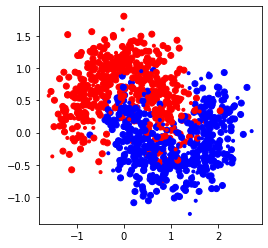

In [8]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright);

In [9]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 8.1.1. AdaBoost alphas and distribution (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [10]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    N = (((y * y_pred_t) < 0) * distribution).sum()
    alpha = 0.5 * np.log((1 - N) / N)
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment    
    distribution *= np.exp(-alpha_t * y_pred_t * y)
    distribution /= distribution.sum()
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.1.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [11]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            # make a prediction
            y_i = self.classifiers[-1].predict(X)
            # update alphas, append new alpha to self.alphas
            alpha_i = ada_boost_alpha(y, y_i, distribution)
            self.alphas.append(alpha_i)
            # update distribution and normalize
            distribution = ada_boost_distribution(y, y_i, distribution, alpha_i)
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        # get the weighted votes of the classifiers
        for alpha, model in zip(self.alphas, self.classifiers):
            final_predictions += alpha * model.predict(X)
        out = np.sign(final_predictions)
        ### END Solution (do not delete this comment)

        return out

In [12]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [13]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


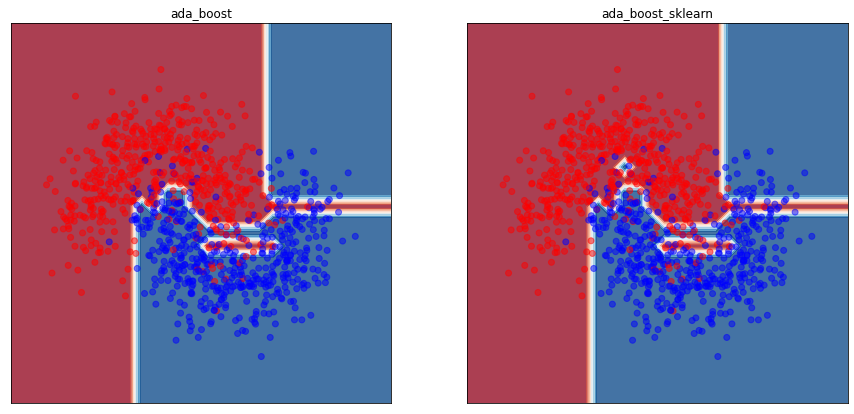

In [14]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 8. Boosting, part 2. (1+1+1 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to recompute all of the alphas on each iteration after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the available estimators. Take into account that at each step of the boosting algorithm **all** alphas and, consequently, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, the noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in the case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the regularization parameter (Lecture 2). Add it in order to guarantee the existence of the solution.

In [15]:
from scipy.optimize import minimize

### Subproblem 8.2.1. Recomputation of AdaBoost alphas and distribution (1 point)

Now let us define functions to recompute alphas and distributions for AdaBoost algorithm

In [26]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    ### BEGIN Solution (do not delete this comment)
    # size of y_pred = (current n_estimators, num of X in X_train)
    y_pred = np.array(y_pred).T
    
    def exp_loss(alpha):
        alpha = np.array(alpha)
        # aggregated_prediction is a weightened sum of the current ensemble predictions.
        # let's divide aggregated_prediction by current number of models in ensemble
        # in order to avoid large numbers in the exponent
        aggregated_prediction = y_pred @ alpha 
        aggregated_prediction /= y_pred.shape[1] 
        # exponential loss with the regularization part
        out = np.exp(-aggregated_prediction * y).sum() + C * ((alpha**2).sum())
        return out
    
    alphas = minimize(exp_loss, x0=np.random.randn(y_pred.shape[1])).x  
    ### END Solution (do not delete this comment)
    return alphas
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """
    ### BEGIN Solution (do not delete this comment)
    y_pred = np.array(y_pred).T
    aggregated_prediction = np.sign(y_pred @ np.array(alphas)[:y_pred.shape[1]])    
    distribution = np.exp(-aggregated_prediction * y)
    distribution /= distribution.sum()  
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.2.2. Recomputed Boosting implementation (1 point)

Implement recomputation of Boosting algorithm. Then compare it with the `sklearn` implementation.

In [27]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            ### BEGIN Solution (do not delete this comment)
            
            # create a list of predictions across all classifiers
            y_pred = []
            for model in self.classifiers:
                y_pred.append(model.predict(X))
                
            # recalculate alphas, add them to the matrix of self.alphas
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            self.alphas[i][:i+1] = self.get_alpha(y, y_pred, self.C)
        
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred, self.alphas[i])
            
            ### END Solution (do not delete this comment)
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        # do not forget that self.alphas is the whole history of recalculated alphas! 
        for alpha, model in zip(self.alphas[-1], self.classifiers):
            final_predictions += alpha * model.predict(X)
        out = np.sign(final_predictions)

        ### END Solution (do not delete this comment)
        
        return out

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [29]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.905
accuracy ada_boost_sklearn: 0.875


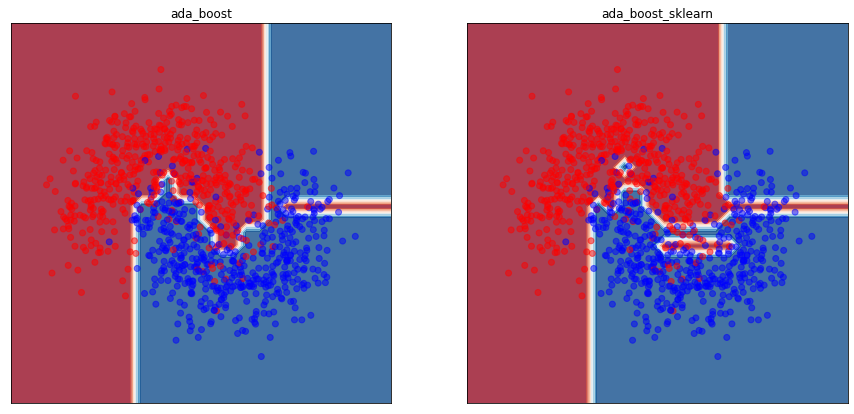

In [30]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

### Subproblem 8.2.3. Plotting the results (1 point)

- Plot the resulting alphas (last calculated in case of recomputed alphas)
- Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) for AdaBoost and RecomputedAdaBoost

In [31]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

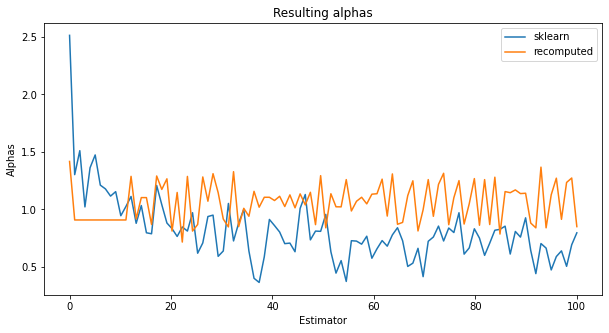

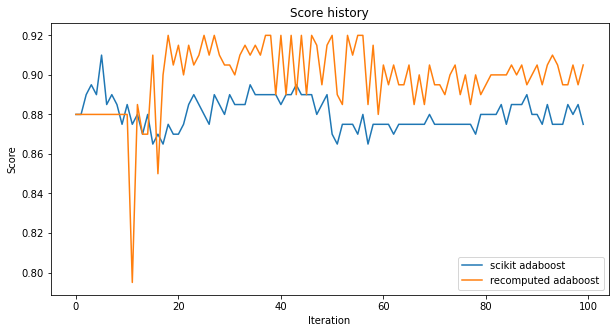

In [32]:
### BEGIN Solution (do not delete this comment)
plt.figure(figsize=(10, 5))
estimator = np.linspace(0, 100, 100)
plt.plot(estimator, ada_boost_sklearn.estimator_weights_, label = "sklearn")
plt.plot(estimator, ada_boost.alphas[-1], label = "recomputed")
plt.xlabel('Estimator')
plt.ylabel('Alphas')
plt.title('Resulting alphas')
plt.legend()
plt.show()


alphas = construct_alpha_history(ada_boost_sklearn.estimator_weights_)
scores_sklearn, scores_adaboost = [], []
for alpha in alphas:
    scores_sklearn.append(score(alpha, ada_boost_sklearn.estimators_, X_test, y_test))

for alpha in ada_boost.alphas:
    scores_adaboost.append(score(alpha, ada_boost.classifiers, X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(scores_sklearn, label = "scikit adaboost")
plt.plot(scores_adaboost, label = "recomputed adaboost")
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Score history')
plt.legend()
plt.show()

### END Solution (do not delete this comment)

Make a conclusion about which method is better and in which case.

**Your text answer (do not delete this comment)**:

* RecomputedAdaBoost is better in terms of accuracy score, if number of iterations (i.e. models in ensemble) is great enough (> 20). Otherwise, when number of iteration is small, the scikit AdaBoost is better (the blue line is higher than the orange one when iteration < 20).
* At the same time, RecomputedAdaBoost is much more computationally demanding. Therefore, in case of large datasets it could be more efficient to use the scikit AdaBoost.

## Task 9. Gradient Boosting and Feature Selection (1+1 points)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]

data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

### Subproblem 9.1 (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for xgb: 0.18354592299999695
Training time for random forest: 0.38760994000000437
Average precision score for XGBoost: 0.7451412369734258
Average precision score for Random Forest: 0.7421563794140958


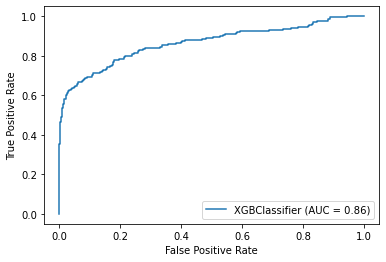

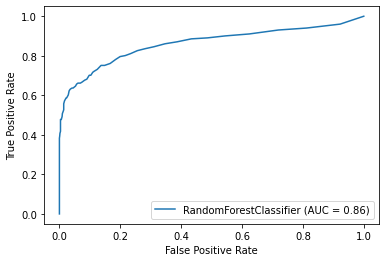

In [38]:
### BEGIN Solution (do not delete this comment)

import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, plot_roc_curve


def fit_time_score(model, X_train, X_test, y_train, y_test):
    # Fit on train & predict probabilities on test for a model
    t1 = time.perf_counter() 
    model.fit(X_train, y_train)
    t2 = time.perf_counter() 
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate train time & average_precision_score
    train_time = t2 - t1
    score = average_precision_score(y_test, y_pred_proba[:, 1])
    return train_time, score


xgb = XGBClassifier(random_state=0)
forest = RandomForestClassifier(random_state=0)
          
xgb_time, xgb_score = fit_time_score(xgb, X_train, X_test, y_train, y_test)
forest_time, forest_score = fit_time_score(forest, X_train, X_test, y_train, y_test)

print(f"Training time for xgb: {xgb_time}")
print(f"Training time for random forest: {forest_time}")
print(f"Average precision score for XGBoost: {xgb_score}")
print(f"Average precision score for Random Forest: {forest_score}")

plot_roc_curve(xgb, X_test, y_test)  
plot_roc_curve(forest, X_test, y_test)  
plt.show() 

### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

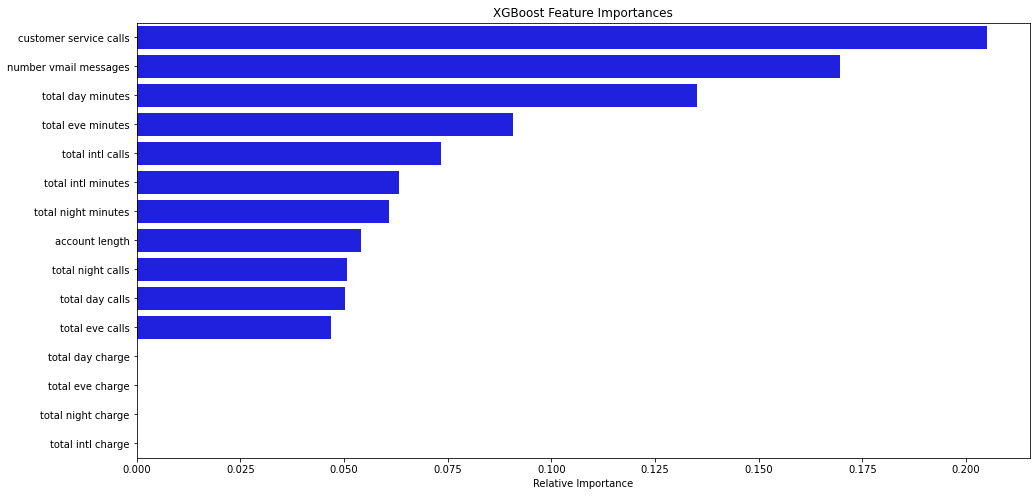

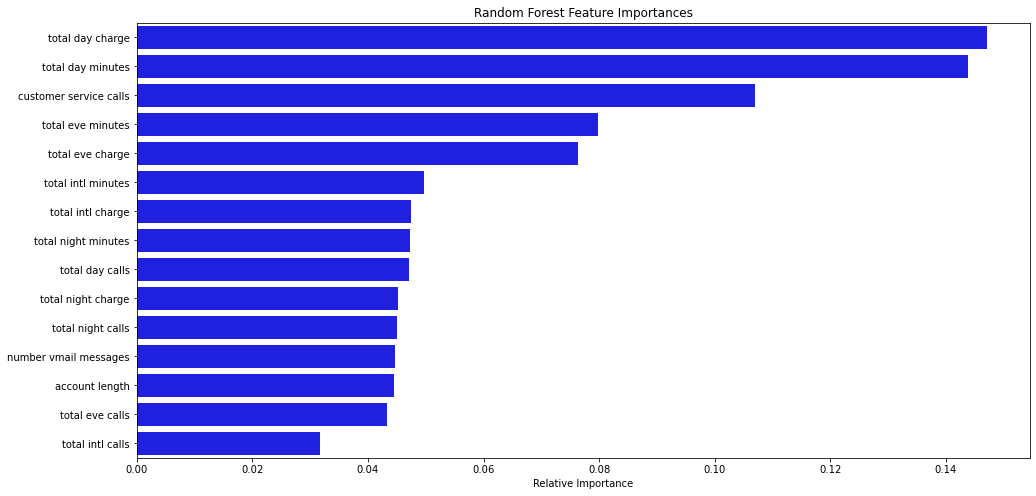

In [39]:
### BEGIN Solution (do not delete this comment)

import seaborn as sns
import pandas as pd

def plot_feature_importance(importances, names, model_name):
    # Create a DataFrame with feature importances and feature names
    data = pd.DataFrame({'feature_names': names,
                         'feature_importances': importances})

    # Sort the DataFrame in order decreasing feature importance
    data.sort_values(by=['feature_importances'], ascending=False, inplace=True)

    # Plot barplot from searborn
    plt.figure(figsize=(16,8))
    sns.barplot(x=data['feature_importances'], y=data['feature_names'], color='blue')
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Relative Importance')
    plt.ylabel('')
    
    
# XGBoostClassifier and RandomForestClassifier keep the feature importances 
# just in the attrubute .feature_importances_  
forest_importances = forest.feature_importances_  
xgb_importances = xgb.feature_importances_

plot_feature_importance(xgb_importances, X_train.columns, 'XGBoost')
plot_feature_importance(forest_importances, X_train.columns, 'Random Forest')

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

They are **different**. I think it is because feature importances are calculated by different procedures in these two classifiers. 
* In RandomForestClassifier the feature importances are impurity-based, and according to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_), they are computed as the (normalized) total reduction of the criterion (by default `criterion='gini'`) brought by that feature.
* In XGBoostClassifier by default `importance_type='gain'` and this type shows the average [gain](https://xgboost.readthedocs.io/en/latest/tutorials/model.html#learn-the-tree-structure) across all splits where feature was used. 

### Subproblem 9.2 (1 point)

* For each model separately (XGBoost classifier and Random Forest classifier) perform the following steps:
    1. define the subset of features (in the beginning the subset contains all features)
    2. fit the model using the subset of features
    3. remove the least important feature from the subset (use the importances received in subproblem 9.1)
    4. repeat steps 2 and 3 until no features are left in the subset
    5. make a plot showing how the average precision changes depending on the size of the subset of the most important features


**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and its ```.transform``` methods to get the new $X$,$y$ subsets

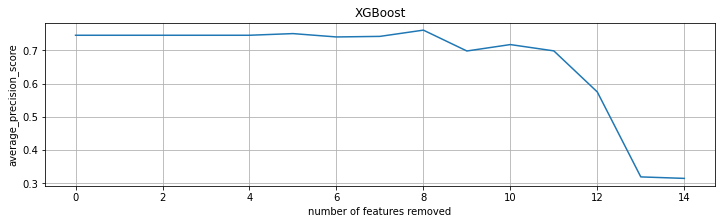

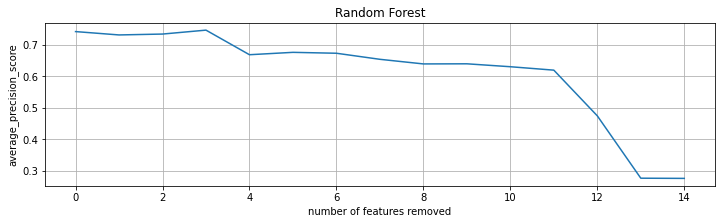

In [40]:
### BEGIN Solution (do not delete this comment)
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score


def plot_score_on_subset(model, X_train, y_train, X_test, y_test, importances, model_title):
    # Create pd.DataFrame with features & importances and sort it.
    # ascending=True => unimportant features come first
    feature_importances = pd.DataFrame({'feature_name': X_train.columns,
                                        'feature_importances': importances})
    feature_importances.sort_values(by=['feature_importances'], 
                                    ascending=True, inplace=True)
    
    # Create copy of all features (to be able to delete them one by one)
    X_train_subset = X_train.copy()
    X_test_subset = X_test.copy()
    
    # Create an array for saving average_precision_score
    ave_precision = []
    
    # On each step: 
    # 1. fit the model using the subset of features
    # 2. calculate average_precision_score of this fitted model
    # 3. remove the least important feature from the train and test subsets
    for i, feature in enumerate(feature_importances['feature_name'].values):
        model.fit(X_train_subset, y_train)
        y_pred = model.predict_proba(X_test_subset)
        ave_precision.append(average_precision_score(y_test, y_pred[:,1]))
        X_train_subset.drop(columns=feature, inplace=True)
        X_test_subset.drop(columns=feature, inplace=True)
    
    # Plot ave_precision after removing all features
    plt.figure(figsize=(12, 3))
    plt.plot(ave_precision)
    plt.grid(True)
    plt.xlabel('number of features removed')
    plt.ylabel('average_precision_score')
    plt.title(model_title)
    plt.show()

    
# Initialize two classifiers   
xgb2 = XGBClassifier(random_state=0)
forest2 = RandomForestClassifier(random_state=0)    

# Plot average_precision_score on subsequently shortened subset of features  
plot_score_on_subset(xgb2, X_train, y_train, X_test, y_test, 
                     xgb.feature_importances_, 'XGBoost')
plot_score_on_subset(forest2, X_train, y_train, X_test, y_test, 
                     forest.feature_importances_, 'Random Forest')

### END Solution (do not delete this comment)

# Task 10. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results. Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta-model, which uses the predictions of base models as features. This technique is widely used in multiple real case scenarios to get better results. One of the main problems of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Complete the ```meta_classfier``` function
* Train meta-classifier on original datasets features, report score on the test.
* Train meta-classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain a better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

**Note**: To save your time, use only part of the dataset to debug your solution.

In [41]:
import sklearn
fc = sklearn.datasets.fetch_covtype()

X_train, X_test, y_train, y_test = train_test_split(fc['data'], fc['target'], test_size=0.4)

### Subproblem 10.1. Base models (1 point)

Chose 6 different base models (base models can be any models that you know, and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them. 

In [42]:
### BEGIN Solution (do not delete this comment)

# To ignore ConvergenceWargnings in LogisticRegression
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm

# Initializing Classifiers
model0 = LogisticRegression(random_state=0, n_jobs=-1)
model1 = KNeighborsClassifier(n_jobs=-1)
model2 = RidgeClassifier(random_state=0)
model3 = RandomForestClassifier(random_state=0, n_jobs=-1)
model4 = XGBClassifier(random_state=0, n_jobs=-1)
model5 = GaussianNB()

# Fitting all models on the whole train set
for model in tqdm([model0, model1, model2, model3, model4, model5]):
    model.fit(X_train, y_train)
    
### END Solution (do not delete this comment)

100%|██████████| 6/6 [24:30<00:00, 245.05s/it]


Report individual scores on the test set. As a score use accuracy.

In [43]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import accuracy_score

# Initializing a list for scores, and for names of models
scores, names = [], []

# Calculating accuracy on test and saving a name of model's class
for model in tqdm([model0, model1, model2, model3, model4, model5]):
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(round(score, 4))
    names.append(model.__class__.__name__)

individual_scores = pd.DataFrame({"Model": names, "Accuracy on test set": scores})
print(individual_scores)
### END Solution (do not delete this comment)

100%|██████████| 6/6 [00:24<00:00,  4.00s/it]

                    Model  Accuracy on test set
0      LogisticRegression                0.6176
1    KNeighborsClassifier                0.9624
2         RidgeClassifier                0.7001
3  RandomForestClassifier                0.9486
4           XGBClassifier                0.8675
5              GaussianNB                0.4612


### Subproblem 10.2. Meta classifier (1 point)

Write meta-classifier function.

In [44]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    from sklearn.model_selection import StratifiedKFold
    from tqdm import tqdm
    
    # Divide train set (X_train, y_train) into n Folds (n=cv).
    # X_train_base contains n-1 folds, X_test_base - 1 fold.
    # y_train_base contains n-1 folds, y_test_base - 1 fold.
    skf = StratifiedKFold(n_splits=cv)
    train_index_base, test_index_base = next(skf.split(X_train, y_train))
    X_train_base, X_test_base = X_train[train_index_base], X_train[test_index_base]
    y_train_base, y_test_base = y_train[train_index_base], y_train[test_index_base]
    
    
    ###-------- Train -----------
    # Train each base model on X_train_base, and save their predictions 
    # obtained on X_test_base to the list 'meta_factors'
    meta_factors_train = []
    for model in tqdm(base_clfs):
        model.fit(X_train_base, y_train_base)
        meta_factors_train.append(model.predict(X_test_base))
    
    # Train the meta model on the (meta_factors_train, y_test_base)
    meta_factors_train = np.array(meta_factors_train).T
    final_classifier.fit(meta_factors_train, y_test_base)
    
    # Re-train ONLY base models on a whole train set 
    for model in tqdm(base_clfs):
        model.fit(X_train, y_train)
    
    ###-------- Predict ----------
    # Obtain meta-factors from pre-trained base models for X_test
    meta_factors_test = []
    for model in tqdm(base_clfs):
        meta_factors_test.append(model.predict(X_test))
    
    # Meta model predictions on the meta_factors_test
    meta_factors_test = np.array(meta_factors_test).T
    y_pred = final_classifier.predict(meta_factors_test)
    
    return y_pred, final_classifier
       
    ### END Solution (do not delete this comment)

Train meta-classifier on original datasets features. And report score on the test.

In [45]:
### BEGIN Solution (do not delete this comment)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

final_classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
final_classifier.fit(X_train, y_train)
y_pred_without_stacking = final_classifier.predict(X_test)
accuracy_without_stacking = accuracy_score(y_pred_without_stacking, y_test)
print(f"meta_classifier accuracy on test set:\t{accuracy_without_stacking}")

### END Solution (do not delete this comment)

meta_classifier accuracy on test set:	0.9490673608571244


Train meta-classifier on those base models. Report the test score (accuracy) in this case.

In [46]:
### BEGIN Solution (do not delete this comment)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from sklearn.metrics import accuracy_score


# Initializing Classifiers again to avoid overlapping of results with 
# the previous task (but still with the same parameters as previously)
base0 = LogisticRegression(random_state=0, n_jobs=-1)
base1 = KNeighborsClassifier(n_jobs=-1)
base2 = RidgeClassifier(random_state=0)
base3 = RandomForestClassifier(random_state=0, n_jobs=-1)
base4 = XGBClassifier(random_state=0, n_jobs=-1)
base5 = GaussianNB()

# Initializing list of base classifiers, 
# the final classifier (=meta classifier),
# and number of folds cv
base_clfs = [base0, base1, base2, base3, base4, base5]
final_classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
cv = 5

# Meta classifier prediction using stacking
y_pred_with_stacking, final_classifier = meta_classifier(base_clfs, 
                                                         final_classifier, 
                                                         X_train, X_test, 
                                                         y_train, cv)

accuracy_with_stacking = accuracy_score(y_pred_with_stacking, y_test)
print(f"meta_classifier accuracy on test set:\t{accuracy_with_stacking}")


### END Solution (do not delete this comment)

100%|██████████| 6/6 [00:24<00:00,  4.08s/it]


meta_classifier accuracy on test set:	0.963215077128289


Does stacking helped to gain better score?

**Your text answer (do not delete this comment)**:

Yes, but not as impressive as I expected :) 
* In comparision with the best base model (kNN) increase in accuracy 0.0008 (0.9624 -> 0.9632)
* In comparision with the single final classifier increase in accuracy 0.014 (0.9491 -> 0.9632)
